## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [8]:
## 
import pandas as pd
import numpy as np

In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x / 255. * 2) -1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 64, 32, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                4160      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
__________

In [21]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [22]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [23]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 95us/step - loss: 1.8520 - acc: 0.3397 - val_loss: 1.6305 - val_acc: 0.4337
Epoch 2/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.5738 - acc: 0.4452 - val_loss: 1.5149 - val_acc: 0.4657
Epoch 3/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.4516 - acc: 0.4903 - val_loss: 1.4746 - val_acc: 0.4815
Epoch 4/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.3529 - acc: 0.5260 - val_loss: 1.4095 - val_acc: 0.5084
Epoch 5/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.2725 - acc: 0.5532 - val_loss: 1.3873 - val_acc: 0.5196
Epoch 6/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.1835 - acc: 0.5833 - val_loss: 1.3780 - val_acc: 0.5233
Epoch 7/100
50000/50000 [==============================] - 3s 68us/step - loss: 1.1185 - acc: 0.6076 - val_loss: 1.3812 - 

50000/50000 [==============================] - 3s 66us/step - loss: 0.1097 - acc: 0.9648 - val_loss: 3.2492 - val_acc: 0.5330
Epoch 60/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.1034 - acc: 0.9661 - val_loss: 3.2374 - val_acc: 0.5235
Epoch 61/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.1185 - acc: 0.9616 - val_loss: 3.1983 - val_acc: 0.5271
Epoch 62/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.0998 - acc: 0.9675 - val_loss: 3.3163 - val_acc: 0.5345
Epoch 63/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.1079 - acc: 0.9651 - val_loss: 3.2540 - val_acc: 0.5311
Epoch 64/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.1064 - acc: 0.9656 - val_loss: 3.0901 - val_acc: 0.5294
Epoch 65/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.0997 - acc: 0.9681 - val_loss: 3.3108 - val_acc: 0.5315
Epoch 66/100
50000/50000 [==============

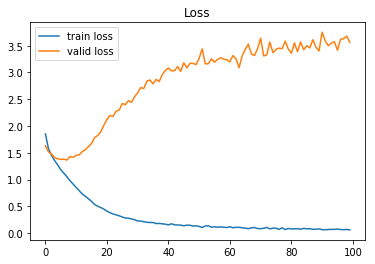

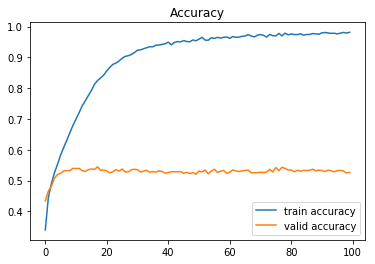

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()